In [116]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [117]:
os.chdir('C:\\Users\\ccrca\\Desktop')


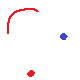

In [118]:
img = Image.open('gg.png').convert('RGB')
arr = np.array(img)
img


In [119]:
X = np.arange(np.shape(arr)[0])
Y = np.arange(np.shape(arr)[1])
V_field = np.zeros(np.shape(arr)[0:2])
#Ex_field = np.zeros(np.shape(arr)[0:2])
#Ey_field = np.zeros(np.shape(arr)[0:2])
for i in range(len(arr)):
    for j in range(len(arr[i])):
        Qij = [arr[i,j][0],arr[i,j][1],arr[i,j][2]]
        if Qij[1] != 255:
            if Qij[0] >= Qij[2]:
                Q = 1
            else:
                Q = -1
            for ii in range(len(V_field)):
                for jj in range(len(V_field[ii])):
                    if (ii,jj) != (i,j):
                        V_field[ii,jj] += Q/np.sqrt((ii-i)**2 + (jj-j)**2)
                        #Ex_field[ii,jj] += (Q/((ii-i)**2 + (jj-j)**2)**(3/2))*(ii-i)
                        #Ey_field[ii,jj] += (Q/((ii-i)**2 + (jj-j)**2)**(3/2))*(jj-j)
                        
Ex_field = -np.gradient(V_field)[1]/np.gradient(X)
Ey_field = -np.gradient(V_field)[0]/np.gradient(Y)


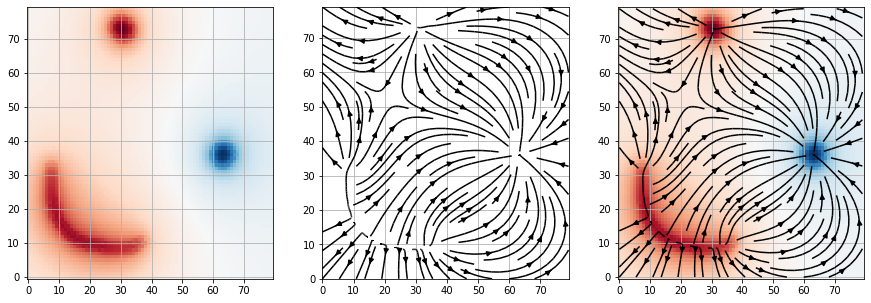

In [120]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].pcolormesh(X, Y, V_field, cmap=plt.cm.RdBu_r)
ax[0].grid(True)

ax[1].streamplot(X, Y, Ex_field, Ey_field, color='black')
ax[1].grid(True)

ax[2].pcolormesh(X, Y, V_field, cmap=plt.cm.RdBu_r)
ax[2].streamplot(X, Y, Ex_field, Ey_field, color='black')
ax[2].grid(True)
